In [151]:
import pandas as pd
import re
import numpy as np

csv = pd.read_csv('./train.csv')
csv = csv[csv['Cabin'].str.contains('S') == True]

csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [152]:
csv = pd.read_csv('./train.csv')
csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [153]:
corr = csv.corr()
corr.style.background_gradient(cmap='coolwarm')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Fare과 Pclass가 음의 상관관계가 보이고 있다. (객실 등급과 그에 따른 가격은 관계가 있음)

In [154]:
#title = csv[csv['Survived'] == 1]
title = csv
for idx, row in title.iterrows():
    temp = row['Name'].split(', ')[1]
    temp = temp.split('.')[0]
    title.loc[idx, 'Name'] = temp
    
title

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,male,26.0,0,0,111369,30.0000,C148,C


In [155]:
survive = title.set_index('Name').groupby('Name').mean()['Survived']
survive = survive.sort_values(ascending=True)
survive

Name
Capt            0.000000
Don             0.000000
Jonkheer        0.000000
Rev             0.000000
Mr              0.156673
Dr              0.428571
Col             0.500000
Major           0.500000
Master          0.575000
Miss            0.697802
Mrs             0.792000
Mme             1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mlle            1.000000
the Countess    1.000000
Name: Survived, dtype: float64

<AxesSubplot:ylabel='Name'>

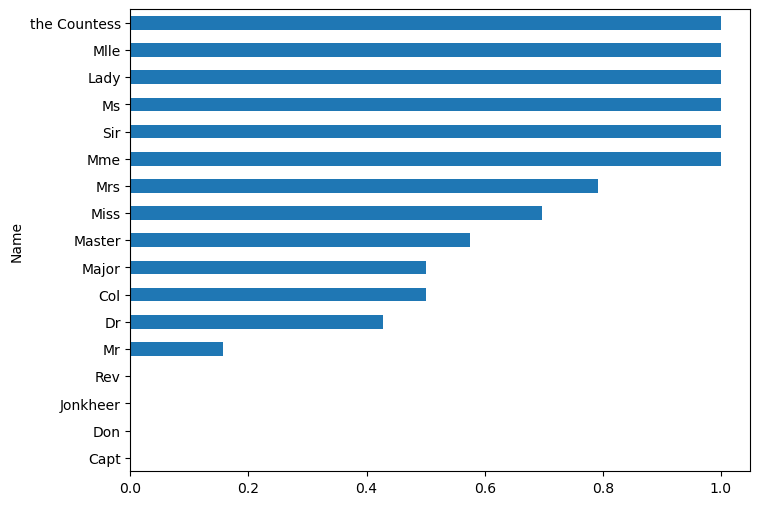

In [156]:
survive.plot.barh(figsize = (8,6))

**생존율 높은 명칭들**

the Countess : 백작부인
Mlle : 프랑스어에서 기혼 여성을 귀하게 일컫는 말. 귀족, 왕족의 여성에게 쓰였다.
Lady : 영국에서 후작·백작·자작·남작 및 준남작·나이트(knight)의 부인과 공작·후작·백작의 딸에 대한 경칭
Sir : 영국에서, 준남작 또는 나이트 작위를 받은 사람의 이름 앞에 붙이는 경칭.

---

**생존율 낮은 명칭들**

Rev : 목사 

Jonkheer : 네덜란드, 벨기에등 저지대 국가귀족 내에서 가장 낮은 계급을 나타내는 경어

Don :  작위 없는 귀족에게 사용

Capt : 탈 것에서 최고 책임자 (선장, 함장, 기장)

주로 여자가 생존율이 높지만 the Countess , Sir와 같이 귀족 계층은 남여 구분없이 생존율이 높았다.

In [157]:
title[title['Name'] == 'the Countess']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,the Countess,female,33.0,0,0,110152,86.5,B77,S


In [158]:
title[title['Name'] == 'Sir']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
599,600,1,1,Sir,male,49.0,1,0,PC 17485,56.9292,A20,C


In [159]:
title[title['Name'] == 'Mlle']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
641,642,1,1,Mlle,female,24.0,0,0,PC 17477,69.3000,B35,C
710,711,1,1,Mlle,female,24.0,0,0,PC 17482,49.5042,C90,C


In [160]:
title[title['Name'] == 'Lady']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
556,557,1,1,Lady,female,48.0,1,0,11755,39.6,A16,C


해당 이름을 가진 사람이 한명밖에 타지 않아 비율로 나타내긴 모순이 있지만, 
모두 고위층 귀족 사람들은 PClass가 1, Cabin이 A,B,C인 위층으로 생존에 유리한 좌석을 탔음을 확인